<a href="https://colab.research.google.com/github/riddhikaa/csir_npl_work/blob/main/top_genes_5000syntheticDATA_ANNtraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm, model_selection, tree, ensemble, neighbors, preprocessing, base, metrics

In [2]:
warnings.filterwarnings("ignore")

In [3]:
file_path = '/content/drive/MyDrive/breastcancer_data/original_Breast_GSE70947.xlsx'
df = pd.read_excel(file_path)

In [4]:
df.head()

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,NM_207327,NM_001004477,NM_020700,NM_005895,NM_000679,NR_003529,NR_036446,NM_001001957,lincRNA:chr7:29652000-29661000_R,ENST00000494108
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,normal,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,10.453202,4.376090,5.597596,11.860087,11.321528,4.486530,5.489959,5.810069,4.834056,4.383929
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,normal,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,10.066372,4.383785,5.404546,11.636828,8.283747,4.770318,5.345571,4.457930,4.441395,4.411587
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,normal,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,10.380676,4.428892,5.356374,12.031338,9.420630,4.394069,5.851030,4.508072,4.568262,4.316081
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,normal,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,10.509871,4.381542,5.757179,11.944607,10.311339,4.451118,6.117379,4.505663,4.413361,4.537626
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,normal,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,10.552841,4.386116,6.851058,11.976510,10.904219,4.432566,6.286439,4.540453,4.412933,4.452250


In [5]:
print("these are the genes :\n",df.columns)
labels=[]
for i in df.columns:
  labels.append(i)

labels.remove('samples') # removing sample label

these are the genes :
 Index(['samples', 'type', 'NM_144987', 'NM_013290', 'ENST00000322831',
       'NM_001625', 'lincRNA:chr7:226042-232442_R', 'NM_032391',
       'ENST00000238571', 'XR_108906',
       ...
       'NM_207327', 'NM_001004477', 'NM_020700', 'NM_005895', 'NM_000679',
       'NR_003529', 'NR_036446', 'NM_001001957',
       'lincRNA:chr7:29652000-29661000_R', 'ENST00000494108'],
      dtype='object', length=16384)


In [6]:
print(labels)

['type', 'NM_144987', 'NM_013290', 'ENST00000322831', 'NM_001625', 'lincRNA:chr7:226042-232442_R', 'NM_032391', 'ENST00000238571', 'XR_108906', 'NM_005937', 'NM_152493', 'lincRNA:chr8:104254399-104295074_F', 'NM_014736', 'ENST00000414816', 'NM_017871', 'NR_028328', 'NM_000266', 'NM_182501', 'NM_174905', 'ERCC-00071_128', 'ERCC-00142_99', 'NM_138783', 'NM_002610', 'NM_001916', 'NM_002196', 'NM_015411', 'NM_138330', 'NM_003725', 'NM_021804', 'NM_015326', 'NM_020974', 'NM_001005515', 'NM_001014811', 'NR_015421', 'NM_033143', 'lincRNA:chr8:145986196-145991421_F', 'NM_176819', 'NM_006472', 'lincRNA:chrX:65009725-65085200_R', 'lincRNA:chr5:124738151-124748189_F', 'NM_003314', 'NM_181515', 'XR_110033', 'NM_001004453', 'NM_024074', 'NM_152778', 'NM_144670', 'NM_198468', 'XR_132725', 'NM_213653', 'A_33_P3344521', 'NM_032553', 'lincRNA:chr8:101925424-101930749_R', 'ERCC-00134_68', 'BC037261', 'NR_034089', 'AJ298317', 'NM_002466', 'XM_003119816', 'NM_003673', 'NR_026903', 'NR_040253', 'NM_015695'

In [7]:
!pip install category_encoders==2.6.0
import category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 1.9 MB/s eta 0:00:00


In [8]:
target = "type"
val_counts = df[target].value_counts()
print(val_counts, "\n\n")

type
normal                   146
breast_adenocarcinoma    143
Name: count, dtype: int64 




In [9]:

# Encoding categorical features (Ordinal Encoding)

class_map = {"normal": 0, "breast_adenocarcinoma": 1}
class_map_reverse = {m : n for m, n in zip(class_map.values(), class_map.keys())}

encoder = category_encoders.OrdinalEncoder(cols = [target], mapping = [{"col": target, "mapping": class_map}])
df['type'] = encoder.fit_transform(df[target])

In [10]:
X = df.drop(columns=df.columns[0]).values
y = df[target].values

print(X.shape, y.shape)
print(X)

(289, 16383) (289,)
[[0.         8.69331779 7.71801596 ... 5.81006943 4.83405623 4.38392868]
 [0.         9.37597965 7.07223164 ... 4.45792972 4.44139474 4.41158681]
 [0.         8.94344176 7.96457276 ... 4.50807186 4.56826205 4.31608095]
 ...
 [1.         9.0513847  7.65189288 ... 4.41435052 4.52880797 4.39442035]
 [1.         8.11460641 8.09668189 ... 6.15655541 4.38106974 4.44705215]
 [1.         8.82757478 7.53889842 ... 4.63430652 4.45075149 4.38308807]]


In [11]:
normal_samples = df[df['type'] == 0]
cancerous_samples = df[df['type'] == 1]

# Calculating mean expression for each gene, excluding the 'type' column
normal_mean_expression = normal_samples[labels].mean(axis=0)
cancerous_mean_expression = cancerous_samples[labels].mean(axis=0)

#highly expressed genes in both groups
top_n = 5000 #top 10,000--> 5000 cancerous and 5000 normal
top_genes_normal = normal_mean_expression.nlargest(top_n)
top_genes_cancerous = cancerous_mean_expression.nlargest(top_n)

print("Top highly expressed genes in normal samples:")
print(top_genes_normal)
print('\n')
print("Top highly expressed genes in cancerous samples:")
print(top_genes_cancerous)

Top highly expressed genes in normal samples:
NM_001195605       18.172377
NM_001033045       17.850794
NM_000518          17.671507
ENST00000361789    17.669676
NM_000150          17.584685
                     ...    
NM_004516           8.670696
NM_178564           8.670048
NM_004458           8.669530
NM_001197247        8.669293
NM_198219           8.669265
Length: 5000, dtype: float64


Top highly expressed genes in cancerous samples:
NM_001195605       18.305861
NM_001033045       17.980294
NM_000150          17.724888
ENST00000361789    17.463887
NM_001035267       17.463603
                     ...    
NM_198679           8.628304
NM_199329           8.627965
NM_004729           8.627868
NM_020750           8.627001
NM_001144875        8.626918
Length: 5000, dtype: float64


In [12]:
top_genes_cancerous_df=pd.DataFrame(top_genes_cancerous)
top_genes_normal_df=pd.DataFrame(top_genes_normal)

In [13]:
top_genes_cancerous_df

,0
NM_001195605,18.305861
NM_001033045,17.980294
NM_000150,17.724888
ENST00000361789,17.463887
NM_001035267,17.463603
...,...
NM_198679,8.628304
NM_199329,8.627965
NM_004729,8.627868
NM_020750,8.627001


In [14]:
# resetting index and naming columns
top_genes_cancerous_df = top_genes_cancerous_df.reset_index()
top_genes_cancerous_df.columns = ['Gene', 'Cancerous']

top_genes_normal_df=top_genes_normal_df.reset_index()
top_genes_normal_df.columns = ['Gene', 'Normal']

In [15]:
top_genes_cancerous_df
# in use

,Gene,Cancerous
0,NM_001195605,18.305861
1,NM_001033045,17.980294
2,NM_000150,17.724888
3,ENST00000361789,17.463887
4,NM_001035267,17.463603
...,...,...
4995,NM_198679,8.628304
4996,NM_199329,8.627965
4997,NM_004729,8.627868
4998,NM_020750,8.627001


In [16]:
cancer_dfs = {}

# Iterate over each column and create a separate DataFrame
for column in top_genes_cancerous_df.columns:
    cancer_dfs[column] = pd.DataFrame(top_genes_cancerous_df[column])

# Access individual DataFrames using column names as keys
# gene_cancer_df = cancer_dfs["Gene"] # not in use
cancerous_expression_df = cancer_dfs["Cancerous"]

In [18]:
cancerous_expression_df
# in use

,Cancerous
0,18.305861
1,17.980294
2,17.724888
3,17.463887
4,17.463603
...,...
4995,8.628304
4996,8.627965
4997,8.627868
4998,8.627001


In [19]:
top_genes_normal_df
# in use

,Gene,Normal
0,NM_001195605,18.172377
1,NM_001033045,17.850794
2,NM_000518,17.671507
3,ENST00000361789,17.669676
4,NM_000150,17.584685
...,...,...
4995,NM_004516,8.670696
4996,NM_178564,8.670048
4997,NM_004458,8.669530
4998,NM_001197247,8.669293


In [20]:
# not in use i guess, ek bar recheck karle

combined_df = pd.merge(top_genes_cancerous_df, top_genes_normal_df, on="Gene", how="outer").reset_index(drop=True)


In [21]:
combined_df

,Gene,Cancerous,Normal
0,NM_001195605,18.305861,18.172377
1,NM_001033045,17.980294,17.850794
2,NM_000150,17.724888,17.584685
3,ENST00000361789,17.463887,17.669676
4,NM_001035267,17.463603,17.317733
...,...,...,...
5336,NM_002501,NaN,8.671285
5337,NM_000587,NaN,8.670857
5338,NM_178564,NaN,8.670048
5339,NM_004458,NaN,8.669530


In [22]:
normal_dfs = {}

# Iterate over each column and create a separate DataFrame
for column in top_genes_normal_df.columns:
    normal_dfs[column] = pd.DataFrame(top_genes_normal_df[column])

# Access individual DataFrames using column names as keys
# gene_normal_df = normal_dfs["Gene"] # not in use
normal_expression_df = normal_dfs["Normal"]

In [24]:
normal_expression_df

# in use

,Normal
0,18.172377
1,17.850794
2,17.671507
3,17.669676
4,17.584685
...,...
4995,8.670696
4996,8.670048
4997,8.669530
4998,8.669293


In [26]:
# gaussian noise addition : to generate synthetic data for normal and cancerous genes
def generate_synthetic_data(df, expression_column, n_samples=10, noise_level=0.1):
    gene_names = df.index
    original_expressions = df[expression_column].values

    synthetic_expressions = []
    for _ in range(n_samples):
        noise = np.random.normal(0, noise_level, original_expressions.shape)
        synthetic_sample = original_expressions + noise
        synthetic_sample = np.clip(synthetic_sample, 0, np.inf)  # Ensure no negative values
        synthetic_expressions.append(synthetic_sample)

    synthetic_df = pd.DataFrame(synthetic_expressions, columns=gene_names).T
    synthetic_df.columns = [f'Synthetic_{i}' for i in range(n_samples)]

    return synthetic_df

# Generate synthetic data for normal and cancerous cases
synthetic_normal_df = generate_synthetic_data(normal_expression_df, 'Normal', n_samples=250, noise_level=0.1)
synthetic_cancerous_df = generate_synthetic_data(cancerous_expression_df, 'Cancerous', n_samples=250, noise_level=0.1)

# Reset index to include gene names as a column
synthetic_normal_df = synthetic_normal_df.reset_index().rename(columns={'index': 'Gene'})
synthetic_cancerous_df = synthetic_cancerous_df.reset_index().rename(columns={'index': 'Gene'})

print("Synthetic Normal Data:")
print(synthetic_normal_df)

print("\nSynthetic Cancerous Data:")
print(synthetic_cancerous_df)

Synthetic Normal Data:
      Gene  Synthetic_0  Synthetic_1  Synthetic_2  Synthetic_3  Synthetic_4  \
0        0    18.281534    18.105161    18.217558    18.164726    18.078963   
1        1    17.804323    18.061206    17.920915    17.854010    17.877606   
2        2    17.692210    17.727353    17.650921    17.872013    17.698301   
3        3    17.529932    17.621122    17.724817    17.683502    17.833167   
4        4    17.568213    17.571568    17.542261    17.467110    17.576683   
...    ...          ...          ...          ...          ...          ...   
4995  4995     8.654836     8.672880     8.712111     8.584862     8.737774   
4996  4996     8.687624     8.658795     8.717481     8.640269     8.570761   
4997  4997     8.541567     8.761754     8.743969     8.795044     8.623930   
4998  4998     8.874150     8.711939     8.715372     8.593713     8.535857   
4999  4999     8.802672     8.498772     8.675468     8.657517     8.563628   

      Synthetic_5  Synthetic

In [27]:
synthetic_normal_df
synthetic_normal_df.drop(columns=synthetic_normal_df.columns[0],inplace=True)
synthetic_cancerous_df.drop(columns=synthetic_cancerous_df.columns[0],inplace=True)

In [28]:
# RENAMING COLS
new_column_prefix = 'Normal'
for i in range(len(synthetic_normal_df.columns)):
    synthetic_normal_df.columns.values[i] = new_column_prefix
synthetic_normal_df
# okay

,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
0,18.281534,18.105161,18.217558,18.164726,18.078963,18.046277,18.187319,18.223373,18.051956,18.164646,...,18.111245,18.156086,18.168185,18.188527,18.206152,18.122622,18.282486,18.289798,18.117123,18.219896
1,17.804323,18.061206,17.920915,17.854010,17.877606,17.665175,17.877626,17.664110,17.873590,17.785509,...,17.978478,17.869558,17.922871,17.889890,17.915970,17.911248,17.825911,17.959335,17.984008,17.883059
2,17.692210,17.727353,17.650921,17.872013,17.698301,17.731895,17.692435,17.612135,17.734194,17.398281,...,17.686202,17.506335,17.622462,17.719294,17.801915,17.657523,17.703871,17.657896,17.548543,17.759686
3,17.529932,17.621122,17.724817,17.683502,17.833167,17.774552,17.729502,17.508643,17.515040,17.686130,...,17.646338,17.790605,17.649309,17.582051,17.559640,17.577279,17.675106,17.536976,17.659161,17.851030
4,17.568213,17.571568,17.542261,17.467110,17.576683,17.487465,17.604012,17.663642,17.583190,17.506979,...,17.541846,17.610672,17.586287,17.551722,17.510386,17.603160,17.662660,17.561304,17.481294,17.769180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8.654836,8.672880,8.712111,8.584862,8.737774,8.688195,8.745664,8.721716,8.531372,8.763697,...,8.700652,8.677879,8.605307,8.660720,8.544351,8.733494,8.678743,8.605559,8.760386,8.696205
4996,8.687624,8.658795,8.717481,8.640269,8.570761,8.605385,8.663784,8.737674,8.658050,8.750511,...,8.801802,8.815515,8.585844,8.657931,8.533821,8.674815,8.655096,8.794361,8.648232,8.887892
4997,8.541567,8.761754,8.743969,8.795044,8.623930,8.639133,8.613580,8.770673,8.563921,8.641130,...,8.839775,8.905352,8.432755,8.858476,8.551111,8.571987,8.658085,8.753656,8.675742,8.715782
4998,8.874150,8.711939,8.715372,8.593713,8.535857,8.627871,8.667088,8.741611,8.596421,8.780858,...,8.703992,8.722852,8.646279,8.534854,8.826601,8.657495,8.638744,8.742783,8.698834,8.665992


In [29]:
new_column_prefix = 'Cancerous'
for i in range(len(synthetic_cancerous_df.columns)):
    synthetic_cancerous_df.columns.values[i] = new_column_prefix
synthetic_cancerous_df
#okay

,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,...,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous
0,18.414855,18.316771,18.358507,18.373498,18.353205,18.379055,18.291941,18.259110,18.358889,18.337852,...,18.414473,18.305462,18.390298,18.187189,18.257066,18.217253,18.445367,18.283906,18.109983,18.198979
1,18.118045,18.060629,17.928466,17.866154,17.907608,18.090864,17.939445,18.016877,18.024345,17.977548,...,17.825974,17.887440,18.198678,17.816523,17.935081,18.114119,17.877395,17.878876,18.006802,17.735016
2,17.541217,17.668865,17.729818,17.680853,17.631537,17.875699,17.722541,17.707941,17.737399,17.812339,...,17.665148,17.640818,17.613297,17.666630,17.727095,17.692572,17.677001,17.768781,17.789276,17.698615
3,17.482980,17.655846,17.423284,17.560252,17.416801,17.546119,17.611079,17.559061,17.463280,17.543031,...,17.535385,17.590689,17.614863,17.528144,17.435141,17.659446,17.428528,17.229048,17.481164,17.337274
4,17.457779,17.270392,17.502773,17.417703,17.369101,17.642745,17.285150,17.355715,17.435233,17.561320,...,17.557340,17.543486,17.456713,17.513848,17.533617,17.640527,17.432501,17.459973,17.392588,17.559038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8.587877,8.553030,8.750465,8.542918,8.706166,8.713040,8.611207,8.737405,8.841382,8.549643,...,8.655766,8.591836,8.657352,8.737307,8.454008,8.581384,8.567163,8.656213,8.576791,8.761097
4996,8.729923,8.485852,8.609931,8.528212,8.657639,8.554386,8.661005,8.688632,8.584347,8.699987,...,8.752600,8.755783,8.561370,8.545972,8.655126,8.601958,8.690774,8.637604,8.613460,8.700517
4997,8.791889,8.507005,8.707051,8.634869,8.717848,8.581906,8.642946,8.547830,8.545072,8.693147,...,8.655381,8.657877,8.682044,8.667672,8.716852,8.565597,8.572704,8.624084,8.477946,8.446339
4998,8.612315,8.768756,8.674014,8.657351,8.600885,8.779842,8.570489,8.502465,8.545428,8.803045,...,8.518054,8.634506,8.679786,8.616232,8.589887,8.706066,8.630373,8.702464,8.535495,8.574730


In [30]:
# synthetic_Data = pd.concat([synthetic_normal_df,synthetic_cancerous_df],axis=1)
# synthetic_Data
# dont use this, it is wrong


In [31]:
# ye correct hua hai (mp lol)
Normal_Data = pd.concat([synthetic_normal_df,top_genes_normal_df],axis=1)
Normal_Data

,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Gene,Normal
0,18.281534,18.105161,18.217558,18.164726,18.078963,18.046277,18.187319,18.223373,18.051956,18.164646,...,18.168185,18.188527,18.206152,18.122622,18.282486,18.289798,18.117123,18.219896,NM_001195605,18.172377
1,17.804323,18.061206,17.920915,17.854010,17.877606,17.665175,17.877626,17.664110,17.873590,17.785509,...,17.922871,17.889890,17.915970,17.911248,17.825911,17.959335,17.984008,17.883059,NM_001033045,17.850794
2,17.692210,17.727353,17.650921,17.872013,17.698301,17.731895,17.692435,17.612135,17.734194,17.398281,...,17.622462,17.719294,17.801915,17.657523,17.703871,17.657896,17.548543,17.759686,NM_000518,17.671507
3,17.529932,17.621122,17.724817,17.683502,17.833167,17.774552,17.729502,17.508643,17.515040,17.686130,...,17.649309,17.582051,17.559640,17.577279,17.675106,17.536976,17.659161,17.851030,ENST00000361789,17.669676
4,17.568213,17.571568,17.542261,17.467110,17.576683,17.487465,17.604012,17.663642,17.583190,17.506979,...,17.586287,17.551722,17.510386,17.603160,17.662660,17.561304,17.481294,17.769180,NM_000150,17.584685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8.654836,8.672880,8.712111,8.584862,8.737774,8.688195,8.745664,8.721716,8.531372,8.763697,...,8.605307,8.660720,8.544351,8.733494,8.678743,8.605559,8.760386,8.696205,NM_004516,8.670696
4996,8.687624,8.658795,8.717481,8.640269,8.570761,8.605385,8.663784,8.737674,8.658050,8.750511,...,8.585844,8.657931,8.533821,8.674815,8.655096,8.794361,8.648232,8.887892,NM_178564,8.670048
4997,8.541567,8.761754,8.743969,8.795044,8.623930,8.639133,8.613580,8.770673,8.563921,8.641130,...,8.432755,8.858476,8.551111,8.571987,8.658085,8.753656,8.675742,8.715782,NM_004458,8.669530
4998,8.874150,8.711939,8.715372,8.593713,8.535857,8.627871,8.667088,8.741611,8.596421,8.780858,...,8.646279,8.534854,8.826601,8.657495,8.638744,8.742783,8.698834,8.665992,NM_001197247,8.669293


In [32]:
# ye correct hua hai (mp lol)
cancer_Data = pd.concat([synthetic_cancerous_df,top_genes_cancerous_df],axis=1)
cancer_Data

,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,...,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Gene,Cancerous
0,18.414855,18.316771,18.358507,18.373498,18.353205,18.379055,18.291941,18.259110,18.358889,18.337852,...,18.390298,18.187189,18.257066,18.217253,18.445367,18.283906,18.109983,18.198979,NM_001195605,18.305861
1,18.118045,18.060629,17.928466,17.866154,17.907608,18.090864,17.939445,18.016877,18.024345,17.977548,...,18.198678,17.816523,17.935081,18.114119,17.877395,17.878876,18.006802,17.735016,NM_001033045,17.980294
2,17.541217,17.668865,17.729818,17.680853,17.631537,17.875699,17.722541,17.707941,17.737399,17.812339,...,17.613297,17.666630,17.727095,17.692572,17.677001,17.768781,17.789276,17.698615,NM_000150,17.724888
3,17.482980,17.655846,17.423284,17.560252,17.416801,17.546119,17.611079,17.559061,17.463280,17.543031,...,17.614863,17.528144,17.435141,17.659446,17.428528,17.229048,17.481164,17.337274,ENST00000361789,17.463887
4,17.457779,17.270392,17.502773,17.417703,17.369101,17.642745,17.285150,17.355715,17.435233,17.561320,...,17.456713,17.513848,17.533617,17.640527,17.432501,17.459973,17.392588,17.559038,NM_001035267,17.463603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8.587877,8.553030,8.750465,8.542918,8.706166,8.713040,8.611207,8.737405,8.841382,8.549643,...,8.657352,8.737307,8.454008,8.581384,8.567163,8.656213,8.576791,8.761097,NM_198679,8.628304
4996,8.729923,8.485852,8.609931,8.528212,8.657639,8.554386,8.661005,8.688632,8.584347,8.699987,...,8.561370,8.545972,8.655126,8.601958,8.690774,8.637604,8.613460,8.700517,NM_199329,8.627965
4997,8.791889,8.507005,8.707051,8.634869,8.717848,8.581906,8.642946,8.547830,8.545072,8.693147,...,8.682044,8.667672,8.716852,8.565597,8.572704,8.624084,8.477946,8.446339,NM_004729,8.627868
4998,8.612315,8.768756,8.674014,8.657351,8.600885,8.779842,8.570489,8.502465,8.545428,8.803045,...,8.679786,8.616232,8.589887,8.706066,8.630373,8.702464,8.535495,8.574730,NM_020750,8.627001


In [33]:
combo_df = pd.merge(cancer_Data, Normal_Data, on="Gene", how="outer").reset_index(drop=True)
combo_df
# ye correct hua hai (mp lol)

,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,Cancerous,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
0,18.414855,18.316771,18.358507,18.373498,18.353205,18.379055,18.291941,18.259110,18.358889,18.337852,...,18.156086,18.168185,18.188527,18.206152,18.122622,18.282486,18.289798,18.117123,18.219896,18.172377
1,18.118045,18.060629,17.928466,17.866154,17.907608,18.090864,17.939445,18.016877,18.024345,17.977548,...,17.869558,17.922871,17.889890,17.915970,17.911248,17.825911,17.959335,17.984008,17.883059,17.850794
2,17.541217,17.668865,17.729818,17.680853,17.631537,17.875699,17.722541,17.707941,17.737399,17.812339,...,17.610672,17.586287,17.551722,17.510386,17.603160,17.662660,17.561304,17.481294,17.769180,17.584685
3,17.482980,17.655846,17.423284,17.560252,17.416801,17.546119,17.611079,17.559061,17.463280,17.543031,...,17.790605,17.649309,17.582051,17.559640,17.577279,17.675106,17.536976,17.659161,17.851030,17.669676
4,17.457779,17.270392,17.502773,17.417703,17.369101,17.642745,17.285150,17.355715,17.435233,17.561320,...,17.363206,17.534481,17.360226,17.377928,17.145210,17.098586,17.454794,17.293650,17.360949,17.317733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.766351,8.631332,8.893363,8.555246,8.728831,8.697190,8.506171,8.667065,8.622127,8.671285
5337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.564843,8.769955,8.728151,8.766455,8.739092,8.720920,8.627617,8.621544,8.725708,8.670857
5338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.815515,8.585844,8.657931,8.533821,8.674815,8.655096,8.794361,8.648232,8.887892,8.670048
5339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.905352,8.432755,8.858476,8.551111,8.571987,8.658085,8.753656,8.675742,8.715782,8.669530


In [34]:
combo_df=combo_df.T
combo_df
# ye correct hua hai (mp lol)

,0,1,2,3,4,5,6,7,8,9,...,5331,5332,5333,5334,5335,5336,5337,5338,5339,5340
Cancerous,18.414855,18.118045,17.541217,17.48298,17.457779,17.414245,17.404401,17.161622,17.23564,17.338113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.316771,18.060629,17.668865,17.655846,17.270392,17.47407,17.391259,17.46161,17.234318,17.448254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.358507,17.928466,17.729818,17.423284,17.502773,17.317344,17.189177,17.275287,17.281008,17.436125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.373498,17.866154,17.680853,17.560252,17.417703,17.431446,17.261412,17.328971,17.370661,17.195797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.353205,17.907608,17.631537,17.416801,17.369101,17.509389,17.486675,17.34448,17.102365,17.408146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normal,18.282486,17.825911,17.66266,17.675106,17.098586,17.36736,17.136437,16.484178,17.521525,17.184879,...,8.697692,8.707243,8.561585,8.593144,8.601089,8.69719,8.72092,8.655096,8.658085,8.771985
Normal,18.289798,17.959335,17.561304,17.536976,17.454794,17.374931,17.050942,16.317294,17.5239,17.205181,...,8.630855,8.731917,8.686198,8.46309,8.642656,8.506171,8.627617,8.794361,8.753656,8.777802
Normal,18.117123,17.984008,17.481294,17.659161,17.29365,17.248182,17.240948,16.296289,17.44914,17.221802,...,8.731805,8.704393,8.582152,8.694263,8.600365,8.667065,8.621544,8.648232,8.675742,8.721196
Normal,18.219896,17.883059,17.76918,17.85103,17.360949,17.217593,16.952355,16.207933,17.445052,17.27748,...,8.708207,8.76692,8.807463,8.651822,8.779669,8.622127,8.725708,8.887892,8.715782,8.615394


In [35]:
index_name = 'Gene'

if index_name in combo_df.index:
    integer_location = combo_df.index.get_loc(index_name)
    print(f"The integer location of the index '{index_name}' is: {integer_location}")
else:
    print(f"Index name '{index_name}' not found in DataFrame.")

The integer location of the index 'Gene' is: 250


In [36]:
combo_df.columns = combo_df.iloc[integer_location]
combo_df

Gene,NM_001195605,NM_001033045,NM_000150,ENST00000361789,NM_001035267,NM_001012,NM_001003,NR_002715,NM_001004,NM_001031,...,NM_000390,NM_213662,NM_006651,NR_023918,NR_034085,NM_002501,NM_000587,NM_178564,NM_004458,NM_198219
Cancerous,18.414855,18.118045,17.541217,17.48298,17.457779,17.414245,17.404401,17.161622,17.23564,17.338113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.316771,18.060629,17.668865,17.655846,17.270392,17.47407,17.391259,17.46161,17.234318,17.448254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.358507,17.928466,17.729818,17.423284,17.502773,17.317344,17.189177,17.275287,17.281008,17.436125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.373498,17.866154,17.680853,17.560252,17.417703,17.431446,17.261412,17.328971,17.370661,17.195797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.353205,17.907608,17.631537,17.416801,17.369101,17.509389,17.486675,17.34448,17.102365,17.408146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normal,18.282486,17.825911,17.66266,17.675106,17.098586,17.36736,17.136437,16.484178,17.521525,17.184879,...,8.697692,8.707243,8.561585,8.593144,8.601089,8.69719,8.72092,8.655096,8.658085,8.771985
Normal,18.289798,17.959335,17.561304,17.536976,17.454794,17.374931,17.050942,16.317294,17.5239,17.205181,...,8.630855,8.731917,8.686198,8.46309,8.642656,8.506171,8.627617,8.794361,8.753656,8.777802
Normal,18.117123,17.984008,17.481294,17.659161,17.29365,17.248182,17.240948,16.296289,17.44914,17.221802,...,8.731805,8.704393,8.582152,8.694263,8.600365,8.667065,8.621544,8.648232,8.675742,8.721196
Normal,18.219896,17.883059,17.76918,17.85103,17.360949,17.217593,16.952355,16.207933,17.445052,17.27748,...,8.708207,8.76692,8.807463,8.651822,8.779669,8.622127,8.725708,8.887892,8.715782,8.615394


In [37]:
combo_df = combo_df.drop(index='Gene')
combo_df

Gene,NM_001195605,NM_001033045,NM_000150,ENST00000361789,NM_001035267,NM_001012,NM_001003,NR_002715,NM_001004,NM_001031,...,NM_000390,NM_213662,NM_006651,NR_023918,NR_034085,NM_002501,NM_000587,NM_178564,NM_004458,NM_198219
Cancerous,18.414855,18.118045,17.541217,17.48298,17.457779,17.414245,17.404401,17.161622,17.23564,17.338113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.316771,18.060629,17.668865,17.655846,17.270392,17.47407,17.391259,17.46161,17.234318,17.448254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.358507,17.928466,17.729818,17.423284,17.502773,17.317344,17.189177,17.275287,17.281008,17.436125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.373498,17.866154,17.680853,17.560252,17.417703,17.431446,17.261412,17.328971,17.370661,17.195797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancerous,18.353205,17.907608,17.631537,17.416801,17.369101,17.509389,17.486675,17.34448,17.102365,17.408146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normal,18.282486,17.825911,17.66266,17.675106,17.098586,17.36736,17.136437,16.484178,17.521525,17.184879,...,8.697692,8.707243,8.561585,8.593144,8.601089,8.69719,8.72092,8.655096,8.658085,8.771985
Normal,18.289798,17.959335,17.561304,17.536976,17.454794,17.374931,17.050942,16.317294,17.5239,17.205181,...,8.630855,8.731917,8.686198,8.46309,8.642656,8.506171,8.627617,8.794361,8.753656,8.777802
Normal,18.117123,17.984008,17.481294,17.659161,17.29365,17.248182,17.240948,16.296289,17.44914,17.221802,...,8.731805,8.704393,8.582152,8.694263,8.600365,8.667065,8.621544,8.648232,8.675742,8.721196
Normal,18.219896,17.883059,17.76918,17.85103,17.360949,17.217593,16.952355,16.207933,17.445052,17.27748,...,8.708207,8.76692,8.807463,8.651822,8.779669,8.622127,8.725708,8.887892,8.715782,8.615394


In [38]:
# filling null with 0
combo_df = combo_df.fillna(0)
combo_df

Gene,NM_001195605,NM_001033045,NM_000150,ENST00000361789,NM_001035267,NM_001012,NM_001003,NR_002715,NM_001004,NM_001031,...,NM_000390,NM_213662,NM_006651,NR_023918,NR_034085,NM_002501,NM_000587,NM_178564,NM_004458,NM_198219
Cancerous,18.414855,18.118045,17.541217,17.482980,17.457779,17.414245,17.404401,17.161622,17.235640,17.338113,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cancerous,18.316771,18.060629,17.668865,17.655846,17.270392,17.474070,17.391259,17.461610,17.234318,17.448254,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cancerous,18.358507,17.928466,17.729818,17.423284,17.502773,17.317344,17.189177,17.275287,17.281008,17.436125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cancerous,18.373498,17.866154,17.680853,17.560252,17.417703,17.431446,17.261412,17.328971,17.370661,17.195797,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cancerous,18.353205,17.907608,17.631537,17.416801,17.369101,17.509389,17.486675,17.344480,17.102365,17.408146,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normal,18.282486,17.825911,17.662660,17.675106,17.098586,17.367360,17.136437,16.484178,17.521525,17.184879,...,8.697692,8.707243,8.561585,8.593144,8.601089,8.697190,8.720920,8.655096,8.658085,8.771985
Normal,18.289798,17.959335,17.561304,17.536976,17.454794,17.374931,17.050942,16.317294,17.523900,17.205181,...,8.630855,8.731917,8.686198,8.463090,8.642656,8.506171,8.627617,8.794361,8.753656,8.777802
Normal,18.117123,17.984008,17.481294,17.659161,17.293650,17.248182,17.240948,16.296289,17.449140,17.221802,...,8.731805,8.704393,8.582152,8.694263,8.600365,8.667065,8.621544,8.648232,8.675742,8.721196
Normal,18.219896,17.883059,17.769180,17.851030,17.360949,17.217593,16.952355,16.207933,17.445052,17.277480,...,8.708207,8.766920,8.807463,8.651822,8.779669,8.622127,8.725708,8.887892,8.715782,8.615394


In [39]:
print(combo_df.columns)

Index(['NM_001195605', 'NM_001033045', 'NM_000150', 'ENST00000361789',
       'NM_001035267', 'NM_001012', 'NM_001003', 'NR_002715', 'NM_001004',
       'NM_001031',
       ...
       'NM_000390', 'NM_213662', 'NM_006651', 'NR_023918', 'NR_034085',
       'NM_002501', 'NM_000587', 'NM_178564', 'NM_004458', 'NM_198219'],
      dtype='object', name='Gene', length=5341)


In [40]:
combo_df

Gene,NM_001195605,NM_001033045,NM_000150,ENST00000361789,NM_001035267,NM_001012,NM_001003,NR_002715,NM_001004,NM_001031,...,NM_000390,NM_213662,NM_006651,NR_023918,NR_034085,NM_002501,NM_000587,NM_178564,NM_004458,NM_198219
Cancerous,18.414855,18.118045,17.541217,17.482980,17.457779,17.414245,17.404401,17.161622,17.235640,17.338113,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cancerous,18.316771,18.060629,17.668865,17.655846,17.270392,17.474070,17.391259,17.461610,17.234318,17.448254,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cancerous,18.358507,17.928466,17.729818,17.423284,17.502773,17.317344,17.189177,17.275287,17.281008,17.436125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cancerous,18.373498,17.866154,17.680853,17.560252,17.417703,17.431446,17.261412,17.328971,17.370661,17.195797,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cancerous,18.353205,17.907608,17.631537,17.416801,17.369101,17.509389,17.486675,17.344480,17.102365,17.408146,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normal,18.282486,17.825911,17.662660,17.675106,17.098586,17.367360,17.136437,16.484178,17.521525,17.184879,...,8.697692,8.707243,8.561585,8.593144,8.601089,8.697190,8.720920,8.655096,8.658085,8.771985
Normal,18.289798,17.959335,17.561304,17.536976,17.454794,17.374931,17.050942,16.317294,17.523900,17.205181,...,8.630855,8.731917,8.686198,8.463090,8.642656,8.506171,8.627617,8.794361,8.753656,8.777802
Normal,18.117123,17.984008,17.481294,17.659161,17.293650,17.248182,17.240948,16.296289,17.449140,17.221802,...,8.731805,8.704393,8.582152,8.694263,8.600365,8.667065,8.621544,8.648232,8.675742,8.721196
Normal,18.219896,17.883059,17.769180,17.851030,17.360949,17.217593,16.952355,16.207933,17.445052,17.277480,...,8.708207,8.766920,8.807463,8.651822,8.779669,8.622127,8.725708,8.887892,8.715782,8.615394


In [41]:
# combo_df['Type']=combo_df.index
combo_df_reset = combo_df.reset_index()
combo_df_reset = combo_df_reset.rename(columns={'index': 'Type'})

In [42]:
combo_df_reset

Gene,Type,NM_001195605,NM_001033045,NM_000150,ENST00000361789,NM_001035267,NM_001012,NM_001003,NR_002715,NM_001004,...,NM_000390,NM_213662,NM_006651,NR_023918,NR_034085,NM_002501,NM_000587,NM_178564,NM_004458,NM_198219
0,Cancerous,18.414855,18.118045,17.541217,17.482980,17.457779,17.414245,17.404401,17.161622,17.235640,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Cancerous,18.316771,18.060629,17.668865,17.655846,17.270392,17.474070,17.391259,17.461610,17.234318,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Cancerous,18.358507,17.928466,17.729818,17.423284,17.502773,17.317344,17.189177,17.275287,17.281008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Cancerous,18.373498,17.866154,17.680853,17.560252,17.417703,17.431446,17.261412,17.328971,17.370661,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cancerous,18.353205,17.907608,17.631537,17.416801,17.369101,17.509389,17.486675,17.344480,17.102365,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,Normal,18.282486,17.825911,17.662660,17.675106,17.098586,17.367360,17.136437,16.484178,17.521525,...,8.697692,8.707243,8.561585,8.593144,8.601089,8.697190,8.720920,8.655096,8.658085,8.771985
498,Normal,18.289798,17.959335,17.561304,17.536976,17.454794,17.374931,17.050942,16.317294,17.523900,...,8.630855,8.731917,8.686198,8.463090,8.642656,8.506171,8.627617,8.794361,8.753656,8.777802
499,Normal,18.117123,17.984008,17.481294,17.659161,17.293650,17.248182,17.240948,16.296289,17.449140,...,8.731805,8.704393,8.582152,8.694263,8.600365,8.667065,8.621544,8.648232,8.675742,8.721196
500,Normal,18.219896,17.883059,17.769180,17.851030,17.360949,17.217593,16.952355,16.207933,17.445052,...,8.708207,8.766920,8.807463,8.651822,8.779669,8.622127,8.725708,8.887892,8.715782,8.615394


In [43]:
combo_df_reset.head()
print(f"Total duplicates: {combo_df_reset.duplicated().sum()}") #checking for duplicates
#checking for null values
print(combo_df_reset.isna().sum())
print(f"Total null count: {combo_df_reset.isna().sum().sum()}")

Total duplicates: 0
Gene
Type               0
NM_001195605       0
NM_001033045       0
NM_000150          0
ENST00000361789    0
                  ..
NM_002501          0
NM_000587          0
NM_178564          0
NM_004458          0
NM_198219          0
Length: 5342, dtype: int64
Total null count: 0


In [44]:
combo_df_reset['Type']


0      Cancerous
1      Cancerous
2      Cancerous
3      Cancerous
4      Cancerous
         ...    
497       Normal
498       Normal
499       Normal
500       Normal
501       Normal
Name: Type, Length: 502, dtype: object

In [45]:
target200 = "Type"
val_counts = combo_df_reset[target200].value_counts()
print(val_counts, "\n\n")


Type
Cancerous    251
Normal       251
Name: count, dtype: int64 




In [46]:
# Encoding categorical features (Ordinal Encoding)

class_map = {"Normal": 0, "Cancerous": 1}
class_map_reverse = {m : n for m, n in zip(class_map.values(), class_map.keys())}

encoder = category_encoders.OrdinalEncoder(cols = [target200], mapping = [{"col": target200, "mapping": class_map}])
combo_df_reset['Type'] = encoder.fit_transform(combo_df_reset[target200])

In [47]:
X = combo_df_reset.drop(columns=combo_df_reset.columns[0]).values
Y = combo_df_reset[target200].values

In [48]:
X

array([[18.41485485, 18.11804492, 17.54121675, ...,  0.        ,
         0.        ,  0.        ],
       [18.31677125, 18.06062943, 17.66886488, ...,  0.        ,
         0.        ,  0.        ],
       [18.35850729, 17.92846626, 17.72981837, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [18.11712254, 17.98400754, 17.4812943 , ...,  8.64823193,
         8.675742  ,  8.72119638],
       [18.21989597, 17.88305892, 17.76918017, ...,  8.88789248,
         8.71578178,  8.61539446],
       [18.17237652, 17.85079405, 17.58468463, ...,  8.67004758,
         8.66953031,  8.66926503]])

In [49]:
Y
# 1 means cancer 0 means normal

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
print(X.shape, Y.shape)

(502, 5341) (502,)


In [51]:
from sklearn import linear_model, svm, model_selection, tree, ensemble, neighbors, preprocessing, base, metrics

In [52]:
# SPLITTIG 70 30
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
print(X_train.shape, X_test.shape)


(351, 5341) (151, 5341)


In [53]:
# Feature Scaling (Z-Score Normalization)
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

print(X_train[0].mean(), X_train[0].std())

-0.01294495936521992 1.0047549845613961


Train Set:
1    176
0    175
Name: count, dtype: int64


Test Set:
0    76
1    75
Name: count, dtype: int64




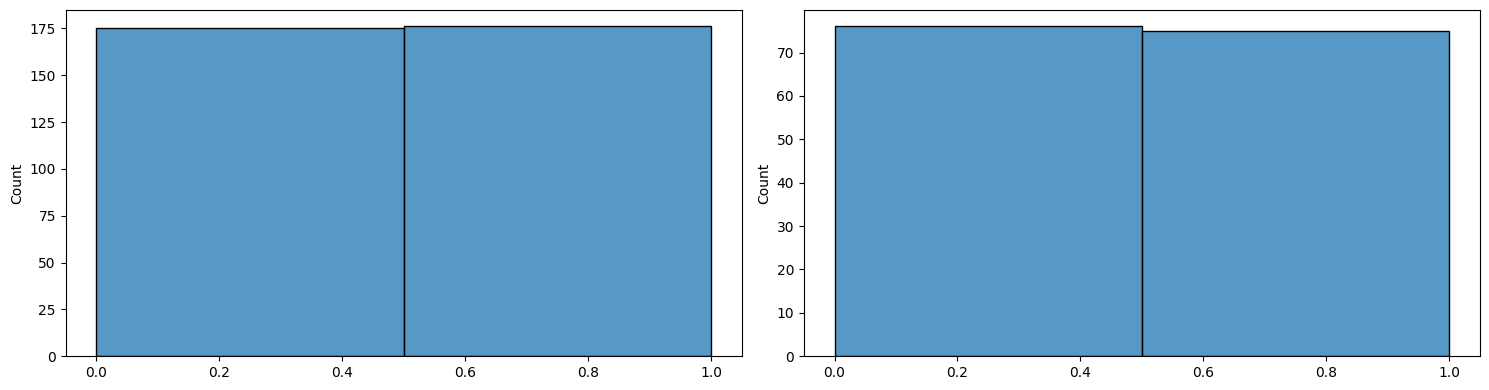

In [54]:
# Checking uniformity of labels across train and test data sets

print(f"Train Set:\n{pd.Series(y_train).value_counts()}\n\n")
print(f"Test Set:\n{pd.Series(y_test).value_counts()}\n\n")

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.histplot(y_train, bins = len(np.unique(y_train)))

plt.subplot(1, 2, 2)
sns.histplot(y_test, bins = len(np.unique(y_test)))

plt.tight_layout()
plt.show()

In [55]:
# Handling class imbalance through Synthetic Minority Over-sampling Technique (SMOTE)
import imblearn
smote = imblearn.over_sampling.SMOTE(random_state = 3, k_neighbors = 3)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape, y_train_resampled.shape)
X_train, y_train = X_train_resampled.copy(), y_train_resampled.copy()

(352, 5341) (352,)


In [56]:
# svm training

# from sklearn.svm import SVC
# svm_model = SVC(random_state=42)
# svm_model.fit(X_train, y_train)

# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# print(svm_model.score(X_train, y_train))
# print(svm_model.score(X_test, y_test))

In [69]:
# ann model train karte hai in 5000 wala dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

#ann
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.000001),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

# Training the model
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.3,
                    verbose=1)

# Evaluation
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               683776    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 695201 (2.65 MB)
Trainable params: 69520

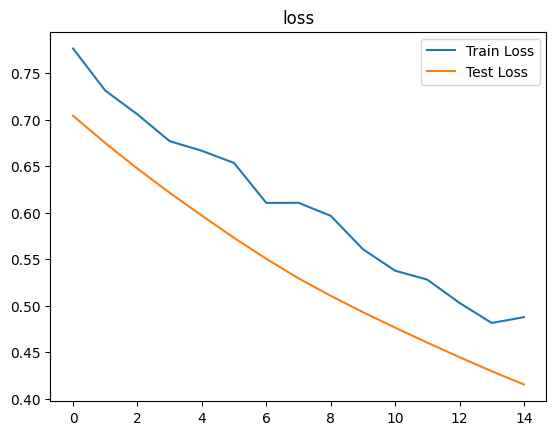

In [70]:
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Test Loss")
plt.legend()
plt.title("loss")
plt.show()


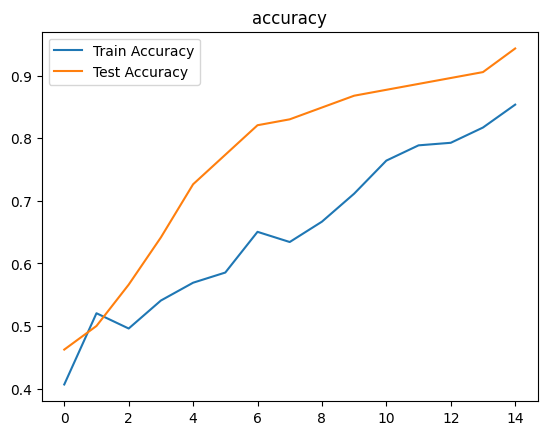

In [71]:
plt.plot(history.history['binary_accuracy'], label="Train Accuracy")
plt.plot(history.history['val_binary_accuracy'], label="Test Accuracy")
plt.legend()
plt.title("accuracy")
plt.show()


In [60]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# #knn

# k = 2 #Number of neighbors
# knn_model = KNeighborsClassifier(n_neighbors=k)

# knn_model.fit(X_train, y_train)
# y_train_pred = knn_model.predict(X_train) #training set
# y_test_pred = knn_model.predict(X_test)#testing set

# #Evaluating model performance on training data
# train_accuracy = accuracy_score(y_train, y_train_pred)
# train_f1 = f1_score(y_train, y_train_pred)
# print(f"Training Accuracy of KNN model: {train_accuracy:.2f}")
# print(f"Training F1 score of KNN model: {train_f1:.2f}")

# #Evaluating model performance on testing data
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_f1 = f1_score(y_test, y_test_pred)
# print(f"Testing Accuracy of KNN model: {test_accuracy:.2f}")
# print(f"Testing F1 score of KNN model: {test_f1:.2f}")